Sentiment analysis on tweets for various companies, want to see how they're changing with time, and whether or not this is a good idea to choose where to throw $$

Still need to confirm tweets are organized by date, that will be done tmrw

In [1]:
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [2]:
consumer_key = '5snDy5NGYkLOMjbvyhbyPR4Qa'
consumer_secret = 'vwMHegxeYn57plCuROuRQI9KXuI9m1l6NBjrUIcW8wb9T35r1J'

access_token = '98916612-tiFFa7Be1MQQUXEqMLNJBSk7mcQpM3rfSxUbJBzph'
access_token_secret = 'AG7ziWD1JGkMDH4QyPAZGYxcRjraRvHbZspzT8sKKASyh'

In [3]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

In [4]:
api = tweepy.API(auth)
#with this, I can create tweets, delete tweets, and find tweets

In [ ]:
for tweet in searched_tweets:
    print(tweet.text)

In [14]:
query = 'trump'
max_tweets = 4
last_id = -1

searched_tweets = []
while len(searched_tweets) < max_tweets:
    count = max_tweets - len(searched_tweets)
    try:
        new_tweets = api.search(q=query, count=count, max_id=str(last_id - 1))
        if not new_tweets:
            break
        searched_tweets.extend(new_tweets)
        last_id = new_tweets[-1].id
    except tweepy.TweepError as e:
        # depending on TweepError.code, one may want to retry or wait
        # to keep things simple, we will give up on an error
        break

In [15]:
polarities = []
for tweet in searched_tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    polarities.append(analysis.sentiment[0])

Muro: Tras una victoria legal, Trump redobla la apuesta y exige fondos para costear toda la obra, no solo secciones https://t.co/3RF6mFZ669
@politico You can’t make this crazy stuff up about this president. It kinda reminds me of something Trump said abou… https://t.co/59oeEvHT0V
RT @benshapiro: BETRAYAL: Trump Says Government Should 'Take The Guns First, Go Through Due Process Second' https://t.co/vYmFzOMEwA https:/…
RT @HannibalBarca65: @ThomasWictor @drawandstrike Trump said two specific, intentional false statements. Horowitz despises Obama. He wrote…


<IPython.core.display.Javascript object>


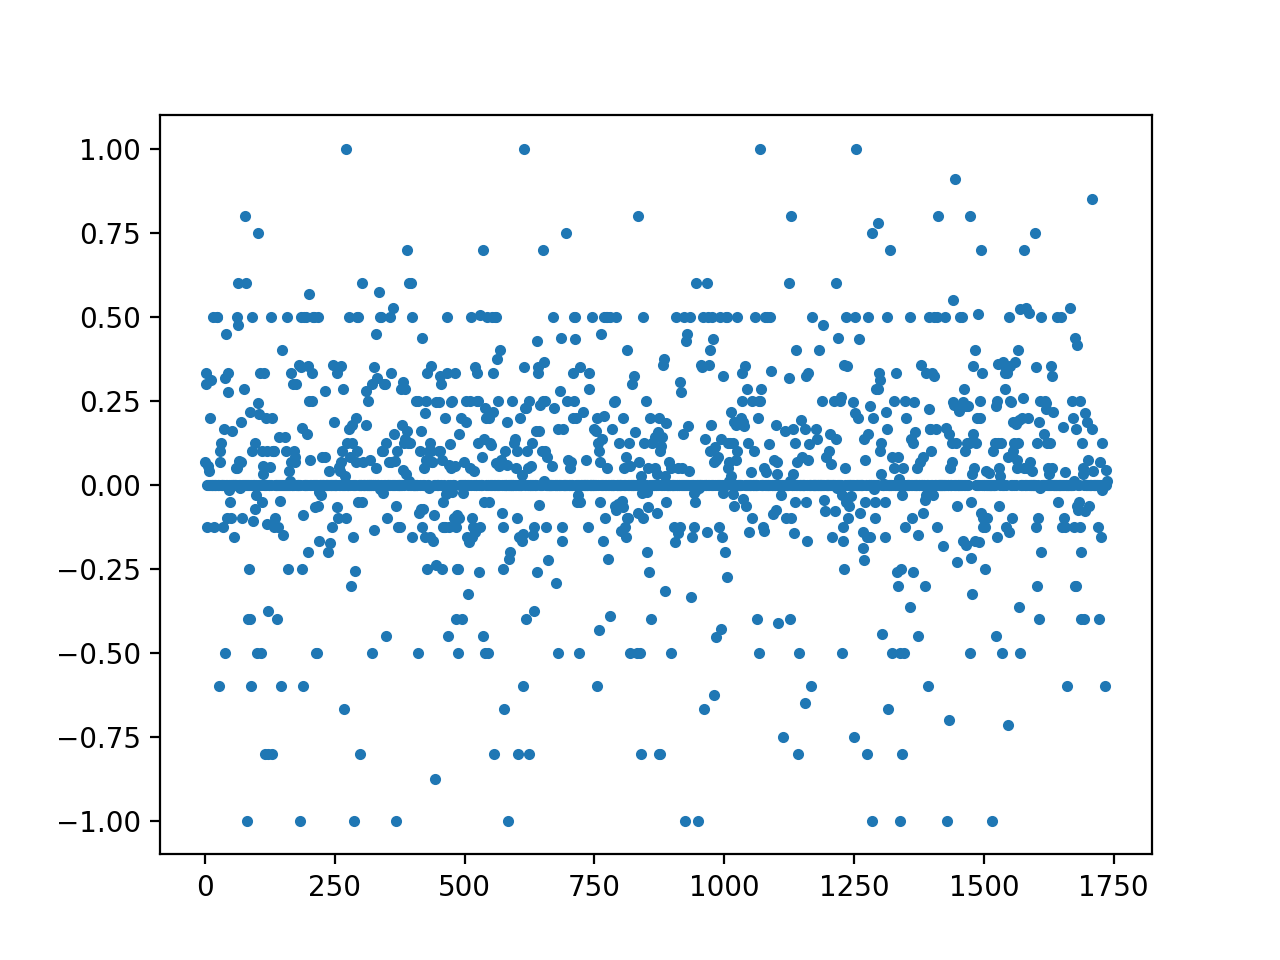

In [13]:
xs = np.arange(len(polarities))
plt.plot(xs,polarities,'.')



In [ ]:
plt.plot(xs,polarities,'.')

In [ ]:
IDS = []
polarities = []
earliest = 1e10  #some big #
loop =0
while loop<3: 

    public_tweets = api.search('Trump',count=100,sinceid=- earliest)
    for tweet in public_tweets:
        IDS.append(tweet.id)
        analysis = TextBlob(tweet.text)
        polarities.append(analysis.sentiment[0])
    
    
    earliest = max(IDS)
    loop +=1
polarities.reverse()  #reverse the order of the array, I go backwards so this fixes it

In [ ]:
#this one raises memory issues, use the other one. 

query = 'nets'
max_tweets = 300
searched_tweets = [status for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]
#searched_tweets = []

In [ ]:

#how to do it with a person
stuff = api.user_timeline(screen_name = 'realdonaldtrump', count = 100, include_rts = True)


In [ ]:
import statistics as s

In [ ]:
s.mean(polarities)